# 自然言語処理
- 形態素解析を最初に行い、数値に変換する
  - 私は南部です --> 私/は/南部/です 

In [1]:
import MeCab # 形態素解析するためのライブラリ

In [2]:
mecab = MeCab.Tagger('-Ochasen') # -O の後は、chasen, wakati, yomi, etc. がある

In [3]:
mecab.parse('こんにちは、南部です。')

'こんにちは\tコンニチハ\tこんにちは\t感動詞\t\t\n、\t、\t、\t記号-読点\t\t\n南部\tナンブ\t南部\t名詞-一般\t\t\nです\tデス\tです\t助動詞\t特殊・デス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

In [4]:
mecab = MeCab.Tagger('-Owakati')

In [5]:
mecab.parse('こんにちは、南部です。')

'こんにちは 、 南部 です 。 \n'

In [6]:
mecab = MeCab.Tagger('-Oyomi') 

In [7]:
mecab.parse('こんにちは、南部です。')

'コンニチハ、ナンブデス。\n'

## 名詞抽出

In [58]:
text = 'キカガクでは、ディープラーニングを含んだ機械学習や人工知能の教育を行っています。'

In [59]:
res = mecab.parse(text)

In [60]:
res

'キカガク\tキカガク\tキカガク\t名詞-一般\t\t\nで\tデ\tで\t助詞-格助詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\n、\t、\t、\t記号-読点\t\t\nディープラーニング\tディープラーニング\tDeep learning\t名詞-固有名詞-一般\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続\nだ\tダ\tだ\t助動詞\t特殊・タ\t基本形\n機械学習\tキカイガクシュウ\t機械学習\t名詞-固有名詞-一般\t\t\nや\tヤ\tや\t助詞-並立助詞\t\t\n人工知能\tジンコウチノウ\t人工知能\t名詞-固有名詞-一般\t\t\nの\tノ\tの\t助詞-連体化\t\t\n教育\tキョウイク\t教育\t名詞-サ変接続\t\t\nを\tヲ\tを\t助詞-格助詞-一般\t\t\n行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続\nて\tテ\tて\t助詞-接続助詞\t\t\nい\tイ\tいる\t動詞-非自立\t一段\t連用形\nます\tマス\tます\t助動詞\t特殊・マス\t基本形\n。\t。\t。\t記号-句点\t\t\nEOS\n'

In [61]:
print(res) # EOS = End of Sentence

キカガク	キカガク	キカガク	名詞-一般		
で	デ	で	助詞-格助詞-一般		
は	ハ	は	助詞-係助詞		
、	、	、	記号-読点		
ディープラーニング	ディープラーニング	Deep learning	名詞-固有名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
含ん	フクン	含む	動詞-自立	五段・マ行	連用タ接続
だ	ダ	だ	助動詞	特殊・タ	基本形
機械学習	キカイガクシュウ	機械学習	名詞-固有名詞-一般		
や	ヤ	や	助詞-並立助詞		
人工知能	ジンコウチノウ	人工知能	名詞-固有名詞-一般		
の	ノ	の	助詞-連体化		
教育	キョウイク	教育	名詞-サ変接続		
を	ヲ	を	助詞-格助詞-一般		
行っ	オコナッ	行う	動詞-自立	五段・ワ行促音便	連用タ接続
て	テ	て	助詞-接続助詞		
い	イ	いる	動詞-非自立	一段	連用形
ます	マス	ます	助動詞	特殊・マス	基本形
。	。	。	記号-句点		
EOS



In [12]:
# res.split('\t' or '\n')[:-2] # .split = Python の組み込みメソッド。[:-2] 最初から最後から 2 行目の 1 個手前まで

In [62]:
res = res.split('\n')[:-2]

In [14]:
# res[0]
# ---------------------------------------------------------------------------
# IndexError                                Traceback (most recent call last)
# <ipython-input-14-35cae1f19bb0> in <module>()
# ----> 1 res[0]

# IndexError: list index out of range

In [15]:
# res[0].split('\t')[3]
# ---------------------------------------------------------------------------
# IndexError                                Traceback (most recent call last)
# <ipython-input-15-6b23f355aafc> in <module>()
# ----> 1 res[0].split('\t')[3]

# IndexError: list index out of range


In [63]:
res

['キカガク\tキカガク\tキカガク\t名詞-一般\t\t',
 'で\tデ\tで\t助詞-格助詞-一般\t\t',
 'は\tハ\tは\t助詞-係助詞\t\t',
 '、\t、\t、\t記号-読点\t\t',
 'ディープラーニング\tディープラーニング\tDeep learning\t名詞-固有名詞-一般\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '含ん\tフクン\t含む\t動詞-自立\t五段・マ行\t連用タ接続',
 'だ\tダ\tだ\t助動詞\t特殊・タ\t基本形',
 '機械学習\tキカイガクシュウ\t機械学習\t名詞-固有名詞-一般\t\t',
 'や\tヤ\tや\t助詞-並立助詞\t\t',
 '人工知能\tジンコウチノウ\t人工知能\t名詞-固有名詞-一般\t\t',
 'の\tノ\tの\t助詞-連体化\t\t',
 '教育\tキョウイク\t教育\t名詞-サ変接続\t\t',
 'を\tヲ\tを\t助詞-格助詞-一般\t\t',
 '行っ\tオコナッ\t行う\t動詞-自立\t五段・ワ行促音便\t連用タ接続',
 'て\tテ\tて\t助詞-接続助詞\t\t',
 'い\tイ\tいる\t動詞-非自立\t一段\t連用形',
 'ます\tマス\tます\t助動詞\t特殊・マス\t基本形',
 '。\t。\t。\t記号-句点\t\t']

In [64]:
nouns = []
words = res

for word in words:    
    section = word.split('\t')
    if '名詞' in section[3]:
        nouns.append(section[0])

In [65]:
nouns

['キカガク', 'ディープラーニング', '機械学習', '人工知能', '教育']

In [66]:
def get_nouns(text):
    nouns = []
    res = mecab.parse(text)
    words = res.split('\n')[:-2]
    for word in words:    
        section = word.split('\t')
        if '名詞' in section[3]:
            nouns.append(section[0])
    return nouns

In [67]:
text1 = 'キカガクでは、ディープラーニングを含んだ機械学習や人工知能の教育を行っています。'
text2 = '代表の吉崎は大学院では機械学習・ロボットのシステム制御、画像処理の研究に携わっていました。'
text3 = '機械学習、システム制御、画像処理ではすべて線形代数とプログラミングが不可欠になります。'

In [68]:
nouns1 = get_nouns(text1)
nouns1

['キカガク', 'ディープラーニング', '機械学習', '人工知能', '教育']

In [69]:
nouns2 = get_nouns(text2)
nouns2

['代表', '吉崎', '大学院', '機械学習', 'ロボット', 'システム', '制御', '画像処理', '研究']

In [70]:
nouns3 = get_nouns(text3)
nouns3

['機械学習', 'システム', '制御', '画像処理', 'すべて', '線形代数', 'プログラミング', '不可欠']

## BoW (Bag of Words)
### BoW のステップ
1. 辞書を作って、ID を振る
2. BoW に変換 (doc2bow, matutils.corpus2dense)
3. 数値化 (ベクトル化、転置、タプル化)

In [71]:
from gensim import corpora, matutils
# gensim というライブラリから、corpora と　matutils (マットutils)をインポート

In [72]:
word_collect = [nouns1, nouns2, nouns3]
word_collect

[['キカガク', 'ディープラーニング', '機械学習', '人工知能', '教育'],
 ['代表', '吉崎', '大学院', '機械学習', 'ロボット', 'システム', '制御', '画像処理', '研究'],
 ['機械学習', 'システム', '制御', '画像処理', 'すべて', '線形代数', 'プログラミング', '不可欠']]

In [73]:
# Step 1 辞書を作る
dictionary = corpora.Dictionary(word_collect)

In [74]:
dictionary # 中身が見れない

In [28]:
# dictionary.shape # dict 型のため .shape も不可

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# <ipython-input-83-3d3837504d79> in <module>()
# ----> 1 dictionary.shape

# AttributeError: 'Dictionary' object has no attribute 'shape'

In [75]:
len(dictionary)

17

In [76]:
# .items() が ID 追加
for word in dictionary.items():
    print(word)

(15, 'すべて')
(13, '不可欠')
(5, '吉崎')
(6, '制御')
(7, '大学院')
(8, '代表')
(0, '教育')
(12, '画像処理')
(11, '研究')
(4, '機械学習')
(3, 'ディープラーニング')
(14, 'プログラミング')
(9, 'ロボット')
(16, '線形代数')
(10, 'システム')
(1, '人工知能')
(2, 'キカガク')


In [77]:
# BoW に変換①
dictionary.doc2bow(nouns1)
# 上の各 ID が何回現れているか。ここでは、ID0-4 までが各 1 回出現
# Signature: dictionary.doc2bow(document, allow_update=False, return_missing=False)
# Docstring:
# Convert `document` (a list of words) into the bag-of-words format = list
# of `(token_id, token_count)` 2-tuples. Each word is assumed to be a
# **tokenized and normalized** string (either unicode or utf8-encoded). No further preprocessing
# is done on the words in `document`; apply tokenization, stemming etc. before
# calling this method.

# If `allow_update` is set, then also update dictionary in the process: create
# ids for new words. At the same time, update document frequencies -- for
# each word appearing in this document, increase its document frequency (`self.dfs`)
# by one.

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [78]:
bow1_id = dictionary.doc2bow(nouns1)
bow2_id = dictionary.doc2bow(nouns2)
bow3_id = dictionary.doc2bow(nouns3)

In [79]:
bow1_id

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [80]:
bow2_id

[(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]

In [81]:
bow3_id

[(4, 1), (6, 1), (10, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]

In [82]:
# matutils を使って、BoW に変換②
matutils.corpus2dense([bow1_id], len(dictionary))
# Signature: matutils.corpus2dense(corpus, num_terms, num_docs=None, dtype=<class 'numpy.float32'>)
# Docstring:
# Convert corpus into a dense np array (documents will be columns). You
# must supply the number of features `num_terms`, because dimensionality
# cannot be deduced from the sparse vectors alone.

# You can optionally supply `num_docs` (=the corpus length) as well, so that
# a more memory-efficient code path is taken.

# This is the mirror function to `Dense2Corpus`.
# File:      /usr/local/lib/python3.5/dist-packages/gensim/matutils.py
# Type:      function

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:307: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [83]:
bow = matutils.corpus2dense([bow1_id], len(dictionary))

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:307: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [84]:
bow.shape

(17, 1)

In [85]:
bow.T # [[]] リストにリストされているから、[] にしないと後々エラー

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [86]:
bow = bow.T

In [87]:
bow.shape

(1, 17)

In [88]:
bow[0]

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [89]:
bow = bow[0]

In [90]:
bow.shape # NN の input_shape=(17, ) とできるようになった

(17,)

In [91]:
type(bow)

numpy.ndarray

# 文章分類

In [92]:
from glob import glob

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [94]:
directories = glob('text/*')
directories

['text/smax',
 'text/kaden-channel',
 'text/sports-watch',
 'text/it-life-hack',
 'text/movie-enter',
 'text/topic-news',
 'text/livedoor-homme',
 'text/dokujo-tsushin',
 'text/peachy']

In [95]:
for (i, directory) in enumerate(directories):
    print(i)
    print(directory)
    print('- - -')

0
text/smax
- - -
1
text/kaden-channel
- - -
2
text/sports-watch
- - -
3
text/it-life-hack
- - -
4
text/movie-enter
- - -
5
text/topic-news
- - -
6
text/livedoor-homme
- - -
7
text/dokujo-tsushin
- - -
8
text/peachy
- - -


In [96]:
texts, labels = [], []
for (i, directory) in enumerate(directories):
    #各ディレクトリ内のtxtファイルのパスをすべて取得
    filepaths = glob('{}/*.txt'.format(directory))
    # テキストを読み込んで、内容をtextに格納、ラベルも併せて格納
    for filepath in filepaths:
        with open(filepath, encoding='utf-8') as f:
            text = ''.join(f.readlines()[2:])  # URL等の先頭２行を除いた各行の文章を連結（join）して格納
            texts.append(text)
            labels.append(i)

In [97]:
texts[0]

'ウィルコム、相手の声が聞き取りやすい「ゆっくり通話」「はっきり通話」を搭載したPHS「Casablanca WX05K」を発表！\n音声が聞き取りやすくボタンが押しやすいPHS \n\nフトバンクモバイルおよびウィルコムは29日、2012年夏以降に発売する予定の新モデル「ソフトバンクモバイル・ウィルコム新商品発表会 2012 Summer」の発表会を行い、見やすく押しやすいボタンデザインのPHS「Casablanca WX05K」（京セラ製）を発表しています。\n\n● 見やすいデザイン\n3.0インチ、ワイドQVGA液晶を搭載し、メールの文字サイズをワンタッチで切り替えることができる「でか文字＆文字サイズ切替」や「でかメニュー」「でか時計」でさらに表示が見やすくなっています。\n\n● 相手の声をより聞きやすい\n相手の声の速度を落として、声を聞き取りやすくする「ゆっくり通話」や、全体の音量を大きめにし、また聞き取りにくい高音域の声を補正して、聞き取りやすくする「はっきり通話」を搭載しています。\n\n● 標準機能も充実\nカメラは有効画素数約300万画素、オートフォーカスにも対応しています。インターネット接続にも対応し、すぐ文字機能を使えば待受画面からそのまま文字の入力が可能となっています。 \n\n記事執筆：S-MAX\n\n■関連リンク\n・エスマックス（S-MAX）\n・エスマックス（S-MAX） smaxjp on Twitter\n・WILLCOM｜2012年夏商戦向け新商品について\n・WILLCOM｜＜Casablanca WX05K（京セラ製）の概要＞\n'

In [98]:
labels[0]

0

In [99]:
mecab = MeCab.Tagger('-Ochasen')

In [100]:
def get_nouns(text):
    nouns = []
    res = mecab.parse(text)
    words = res.split('\n')[:-2]
    for word in words:    
        section = word.split('\t')
        if '名詞' in section[3]:
            nouns.append(section[0])
    return nouns

In [101]:
word_collect = [ get_nouns(text) for text in texts ]

In [102]:
len(word_collect)

7376

In [103]:
dictionary = corpora.Dictionary(word_collect)

In [104]:
len(dictionary)

86471

In [105]:
dictionary.filter_extremes(no_below=20)

In [106]:
len(dictionary)

7494

In [107]:
dictionary.save_as_text('livedoordic.txt')

In [108]:
n_words = len(dictionary)

In [109]:
x = []
for nouns in word_collect:
    bow_id = dictionary.doc2bow(nouns)
    bow = matutils.corpus2dense([bow_id], n_words).T[0]
    x.append(bow)

/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:307: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [149]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [111]:
t = labels

In [119]:
# t

In [113]:
t = np.array(t)

In [114]:
t # 0-8 の 9 分類

array([0, 0, 0, ..., 8, 8, 8])

In [127]:
t.shape

(7376,)

In [116]:
type(x)

list

In [117]:
x = np.array(x)

In [121]:
x.shape # (t に対する x の数、入力変数)

(7376, 7494)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [125]:
len(x_train), len(x_val), len(t_train), len(t_val)

(5163, 2213, 5163, 2213)

In [151]:
pd.DataFrame(x_train)
# 20 回以下の単語だけにしてある行列において、その場所で単語が出てきた回数だからほとんどゼロ
# 1 行が文章で、単語の羅列を 7494 列分していて、その中で、何回その単語がその場所で出てきているか。

# Alexa とかも、声の入力の周波数を、まず周波数帯から言語化
# その後に、その言語化した情報を自然言語処理にかけて、また数値化 (BoW がほぼ一強)
# Alexa とかの場合、名詞抽出だけでなく、おそらく動詞の抽出も行っている
# "Alexa、音楽、を、かけて" --> 音楽という名詞とかけてという動詞が重要

,0,1,2,3,4,5,6,7,8,9,...,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
from tensorflow.keras import models, layers

reset_seed(0)

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(7494, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [153]:
history = model.fit(x_train, t_train,
                   batch_size=128,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 5163 samples, validate on 2213 samples
Epoch 1/50
5163/5163 [==============================] - 2s 451us/sample - loss: 1.1086 - accuracy: 0.6742 - val_loss: 1.6365 - val_accuracy: 0.7732
Epoch 2/50
5163/5163 [==============================] - 0s 91us/sample - loss: 0.3647 - accuracy: 0.9448 - val_loss: 1.1228 - val_accuracy: 0.8830
Epoch 3/50
5163/5163 [==============================] - 0s 90us/sample - loss: 0.1543 - accuracy: 0.9864 - val_loss: 0.7296 - val_accuracy: 0.9028
Epoch 4/50
5163/5163 [==============================] - 0s 88us/sample - loss: 0.0821 - accuracy: 0.9957 - val_loss: 0.4741 - val_accuracy: 0.9141
Epoch 5/50
5163/5163 [==============================] - 0s 88us/sample - loss: 0.0536 - accuracy: 0.9971 - val_loss: 0.3393 - val_accuracy: 0.9268
Epoch 6/50
5163/5163 [==============================] - 0s 88us/sample - loss: 0.0362 - accuracy: 0.9988 - val_loss: 0.2814 - val_accuracy: 0.9268
Epoch 7/50
5163/5163 [==============================] - 0s 88us/sampl

In [142]:
type(history.history)

dict

In [143]:
results = pd.DataFrame(history.history)

In [144]:
results

,accuracy,loss,val_accuracy,val_loss
0,0.662018,1.177138,0.761862,1.696038
1,0.936084,0.369945,0.884772,1.148160
2,0.981987,0.166817,0.913692,0.743689
3,0.993027,0.089094,0.924085,0.490274
4,0.997095,0.055740,0.929056,0.362872
5,0.998838,0.037209,0.927248,0.301923
6,0.999032,0.027322,0.929056,0.278376
7,0.999225,0.021836,0.929959,0.269687
8,0.999419,0.017556,0.929056,0.262169
9,0.999613,0.013842,0.929959,0.262949


In [154]:
results[['accuracy', 'val_accuracy']].tail()

,accuracy,val_accuracy
45,1.000000,0.928604
46,1.000000,0.929507
47,1.000000,0.928604
48,0.999806,0.929507
49,1.000000,0.929056


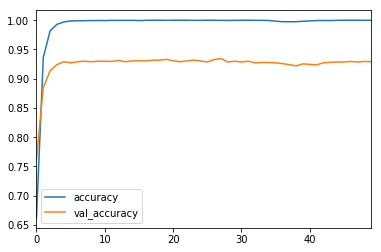

In [155]:
results[['accuracy', 'val_accuracy']].plot()

In [156]:
results[['loss', 'val_loss']].tail()

,loss,val_loss
45,0.001015,0.323651
46,0.000970,0.321774
47,0.000995,0.321516
48,0.002265,0.323005
49,0.000698,0.323210


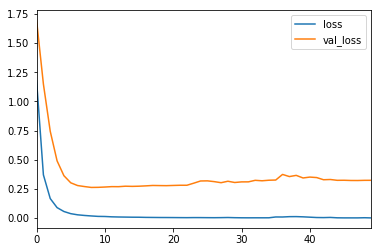

In [157]:
results[['loss', 'val_loss']].plot()

In [191]:
# from tensorflow.keras import models, layers

# reset_seed(0)

# model = models.Sequential()

# model.add(layers.Dense(32, activation='relu', input_shape=(7494, )))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dense(9, activation='softmax'))

# model.compile(optimizer='Adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [193]:
# history = model.fit(x_train, t_train,
#                    batch_size=128,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(x_val, t_val))

In [169]:
# type(history.history)

dict

In [170]:
# results = pd.DataFrame(history.history)

In [194]:
# results

In [195]:
# results[['accuracy', 'val_accuracy']].tail()

In [198]:
# results[['accuracy', 'val_accuracy']].plot()

In [196]:
# results[['loss', 'val_loss']].tail()

In [197]:
# results[['loss', 'val_loss']].plot()